In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

Creating some dummy, noised, S-shaped points:

In [106]:
x = np.linspace(-5, 5, 10)
x += (np.random.random(10)-0.5)/2
y = 1 / (1 + np.exp(-x))
y += (np.random.random(10)-0.5)/8
x = np.clip((x+5)/10, 0.01, 0.99)
y = np.clip(y, 0.01, 0.99)

Fitting the regresssion model:

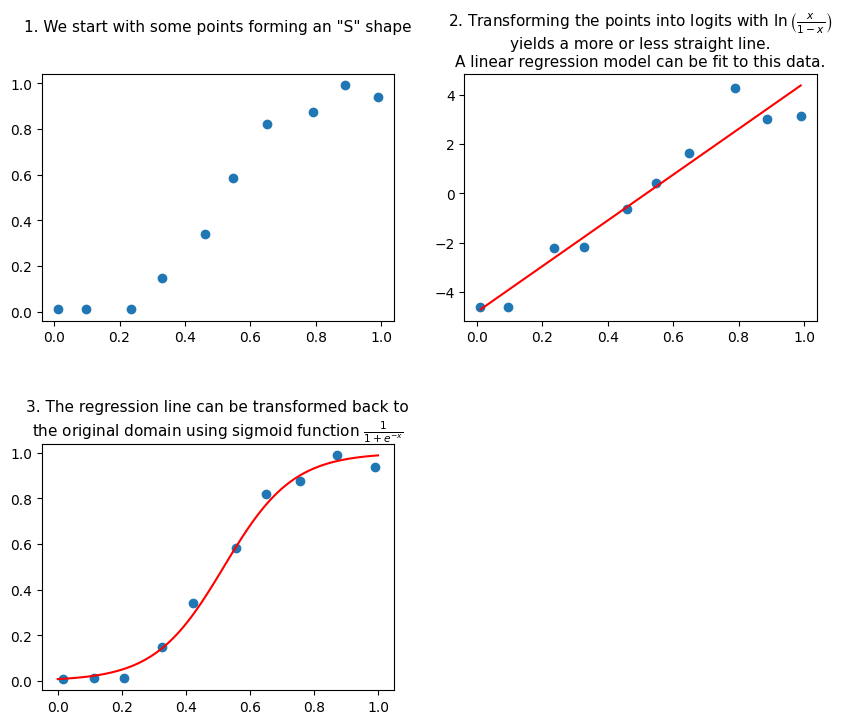

In [115]:
plt.figure(figsize=(10, 8))
plt.subplots_adjust(hspace=.5)
plt.subplot(2,2,1)
plt.title('1. We start with some points forming an "S" shape\n\n', fontsize=11)
plt.scatter(x,prob_true)

plt.subplot(2,2,2)
y_logit = np.log(y / (1 - y))
regressor = LinearRegression().fit(x.reshape(-1, 1), y_logit.reshape(-1, 1))
y_predicted = regressor.predict(x.reshape(-1, 1))
plt.title('2. Transforming the points into logits with $\\ln{\\left(\\frac{x}{1-x}\\right)}$\nyields a more or less straight line.\nA linear regression model can be fit to this data.', fontsize=11)
plt.scatter(x, y_logit)
plt.plot(x, y_predicted, color='red')

plt.subplot(2,2,3)
plt.title('3. The regression line can be transformed back to\nthe original domain using sigmoid function $\\frac{1}{1+e^{-x}}$', fontsize=11)
x_new = np.linspace(0,1,100)
y_new = regressor.predict(x_new.reshape(-1, 1))
y_new_sigmoid = 1 / (1 + np.exp(-y_new))
plt.scatter(prob_pred,prob_true)
plt.plot(x_new, y_new_sigmoid, color='red')
plt.show()